In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('../Input/preprocessed.csv')
print("Dataset shape:", df.shape)
print("Shape of Suicide dataset:", df[df['class'] == 'suicide'].shape)
print("Shape of Non Suicide dataset:", df[df['class'] == 'non-suicide'].shape)

df.dropna(inplace=True)
print("\nAfter removing NaN values:")
print("Dataset shape:", df.shape)
print("Shape of Suicide dataset:", df[df['class'] == 'suicide'].shape)
print("Shape of Non Suicide dataset:", df[df['class'] == 'non-suicide'].shape)

Dataset shape: (232074, 3)
Shape of Suicide dataset: (116037, 3)
Shape of Non Suicide dataset: (116037, 3)

After removing NaN values:
Dataset shape: (232030, 3)
Shape of Suicide dataset: (116025, 3)
Shape of Non Suicide dataset: (116005, 3)


In [8]:
df.head(10)

,text,class,processed_text
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,ex wife threaten suicide recently left wife go...
1,Am I weird I don't get affected by compliments...,non-suicide,weird dont get affected compliment come someon...
2,Finally 2020 is almost over... So I can never ...,non-suicide,finally almost not_hear bad year ever swear fu...
3,i need helpjust help me im crying so hard,suicide,need helpjust help im cry hard
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,im lose hello name adam ive struggle year im a...
5,Honetly idkI dont know what im even doing here...,suicide,honetly idk dont know im even feel like not_an...
6,[Trigger warning] Excuse for self inflicted bu...,suicide,trigger warn excuse self inflict burnsi know c...
7,It ends tonight.I can’t do it anymore. \nI quit.,suicide,end tonighti cant anymore quit
8,"Everyone wants to be ""edgy"" and it's making me...",non-suicide,everyone want edgy make self conscious feel li...
9,My life is over at 20 years oldHello all. I am...,suicide,life year old hello year old balding male hair...


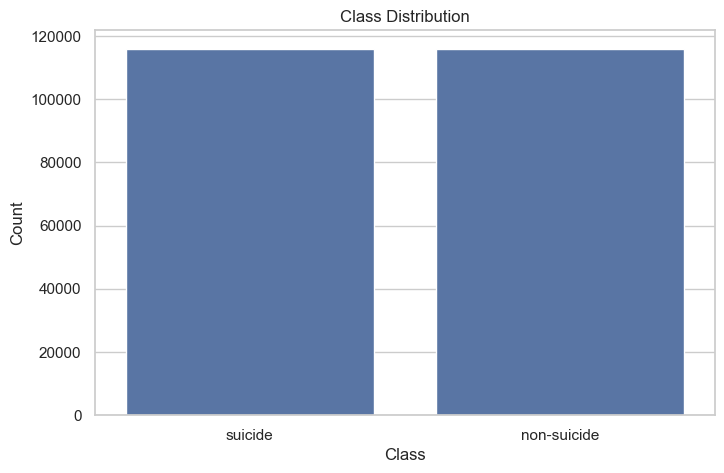

In [9]:
# Class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

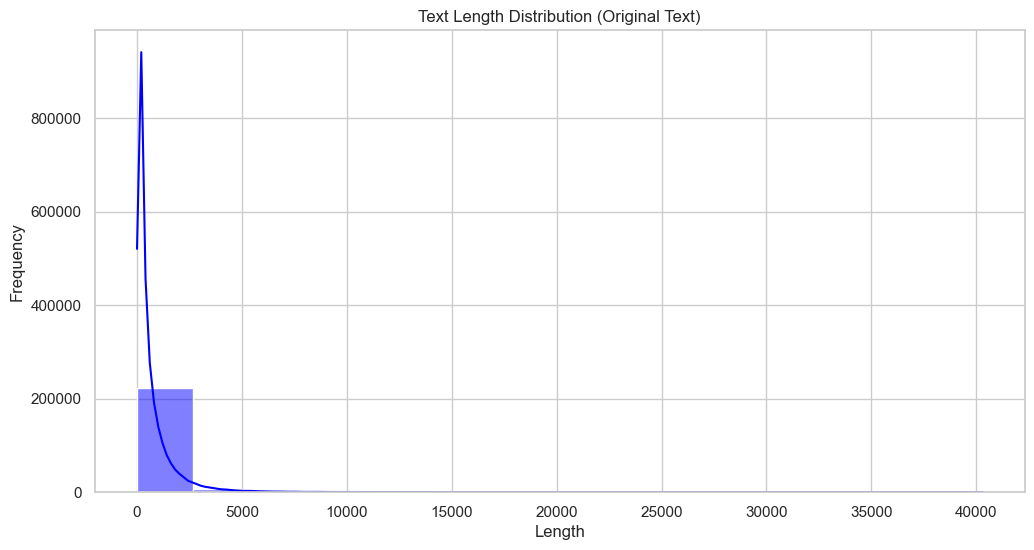

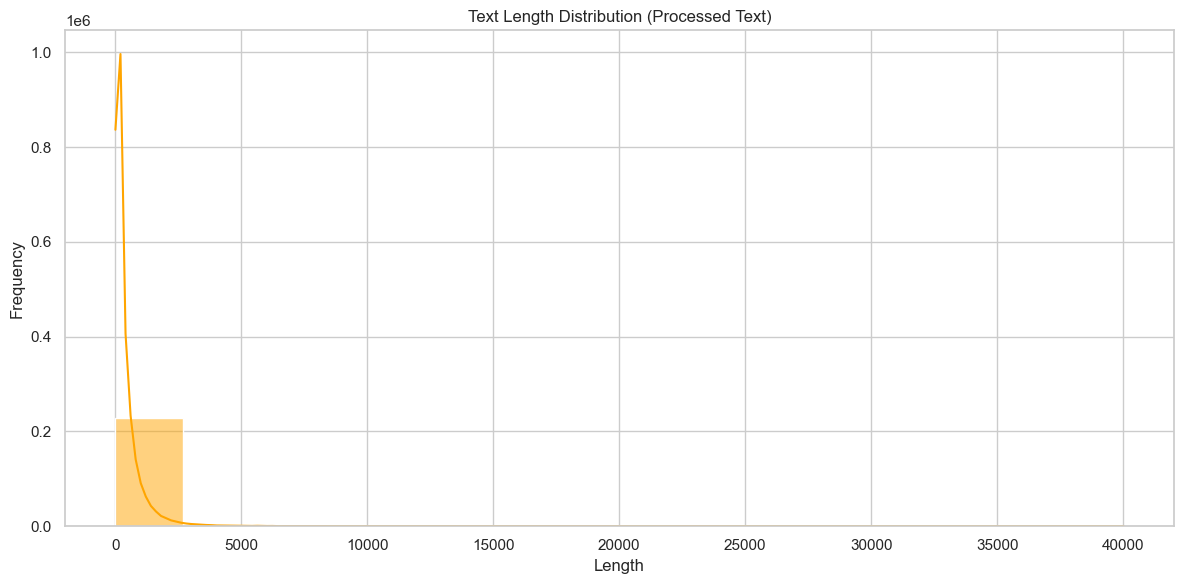

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

df['text_length'] = df['text'].apply(len)
df['processed_text_length'] = df['processed_text'].apply(len)

# Set the style for seaborn
sns.set(style="whitegrid")

# Histogram of text lengths
plt.figure(figsize=(12, 6))
sns.histplot(df['text_length'], bins=15, color='blue', kde=True)
plt.title('Text Length Distribution (Original Text)')
plt.xlabel('Length')
plt.ylabel('Frequency')

# Histogram of processed text lengths
plt.figure(figsize=(12, 6))
sns.histplot(df['processed_text_length'], bins=15, color='orange', kde=True)
plt.title('Text Length Distribution (Processed Text)')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


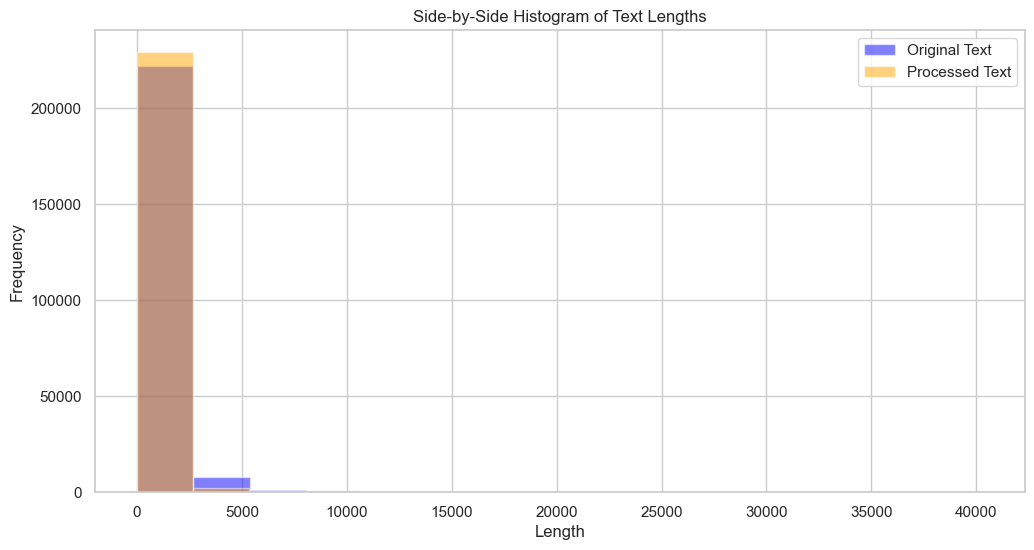

In [37]:
plt.figure(figsize=(12, 6))
plt.hist(df['text_length'], bins=15, alpha=0.5, label='Original Text', color='blue')
plt.hist(df['processed_text_length'], bins=15, alpha=0.5, label='Processed Text', color='orange')
plt.title('Side-by-Side Histogram of Text Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


<Figure size 1000x600 with 0 Axes>

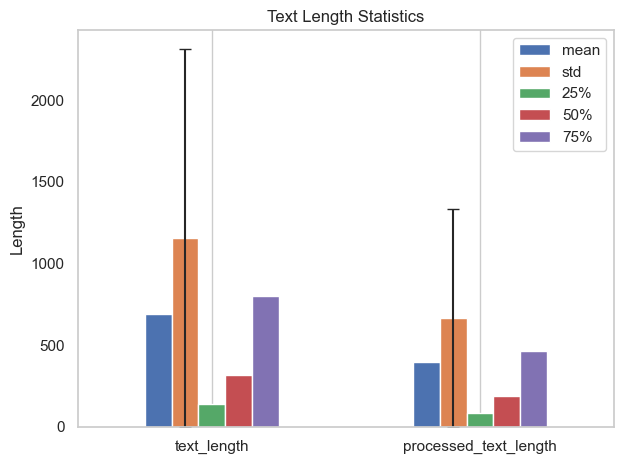

In [44]:
# Calculate summary statistics for both text lengths
text_length_stats = df[['text_length', 'processed_text_length']].describe()
text_length_stats = text_length_stats.transpose()

# Plotting
plt.figure(figsize=(10, 6))
text_length_stats[['mean', 'std', '25%', '50%', '75%']].plot(kind='bar', yerr=text_length_stats[['std']], capsize=4)
plt.title('Text Length Statistics')
plt.ylabel('Length')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [13]:
from collections import Counter
import re

# Function to clean and split words
def get_common_words(text_series):
    # Convert to string and handle missing values
    words = ' '.join(text_series.dropna().astype(str)).lower()
    words = re.findall(r'\b\w+\b', words)  # Only keep words
    return Counter(words).most_common(10)

# Common words for each class and both fields
# For original text
suicide_words_text = get_common_words(df[df['class'] == 'suicide']['text'])
non_suicide_words_text = get_common_words(df[df['class'] == 'non-suicide']['text'])

# For processed text
suicide_words_processed = get_common_words(df[df['class'] == 'suicide']['processed_text'])
non_suicide_words_processed = get_common_words(df[df['class'] == 'non-suicide']['processed_text'])

# Display the results
print("\nCommon Words in Suicide Class (Original Text):")
print(suicide_words_text)

print("\nCommon Words in Non-Suicide Class (Original Text):")
print(non_suicide_words_text)

print("\nCommon Words in Suicide Class (Processed Text):")
print(suicide_words_processed)

print("\nCommon Words in Non-Suicide Class (Processed Text):")
print(non_suicide_words_processed)



Common Words in Suicide Class (Original Text):
[('i', 1854839), ('to', 850136), ('and', 707851), ('the', 515084), ('my', 507911), ('a', 465463), ('it', 383403), ('t', 371953), ('of', 346338), ('me', 341816)]

Common Words in Non-Suicide Class (Original Text):
[('i', 364384), ('and', 190301), ('to', 187504), ('the', 168986), ('a', 160063), ('it', 118586), ('my', 111419), ('you', 91505), ('of', 87996), ('that', 77158)]

Common Words in Suicide Class (Processed Text):
[('im', 284180), ('dont', 179615), ('want', 156381), ('get', 145389), ('feel', 140506), ('go', 135387), ('like', 132244), ('life', 117823), ('know', 116529), ('ive', 100589)]

Common Words in Non-Suicide Class (Processed Text):
[('im', 62380), ('filler', 56715), ('like', 52812), ('get', 47043), ('dont', 34562), ('go', 30886), ('fuck', 30117), ('want', 27356), ('know', 26995), ('say', 26902)]


In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure all texts are strings and handle NaN values
df['text'] = df['text'].fillna('').astype(str)
df['processed_text'] = df['processed_text'].fillna('').astype(str)

# Combine all original texts for each class
suicide_text_original = ' '.join(df[df['class'] == 'suicide']['text'])
non_suicide_text_original = ' '.join(df[df['class'] == 'non-suicide']['text'])

# Combine all processed texts for each class
suicide_text_processed = ' '.join(df[df['class'] == 'suicide']['processed_text'])
non_suicide_text_processed = ' '.join(df[df['class'] == 'non-suicide']['processed_text'])

In [26]:
# Generate word clouds for original texts
suicide_wordcloud_original = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(suicide_text_original)
non_suicide_wordcloud_original = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(non_suicide_text_original)

# Generate word clouds for processed texts
suicide_wordcloud_processed = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(suicide_text_processed)
non_suicide_wordcloud_processed = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(non_suicide_text_processed)

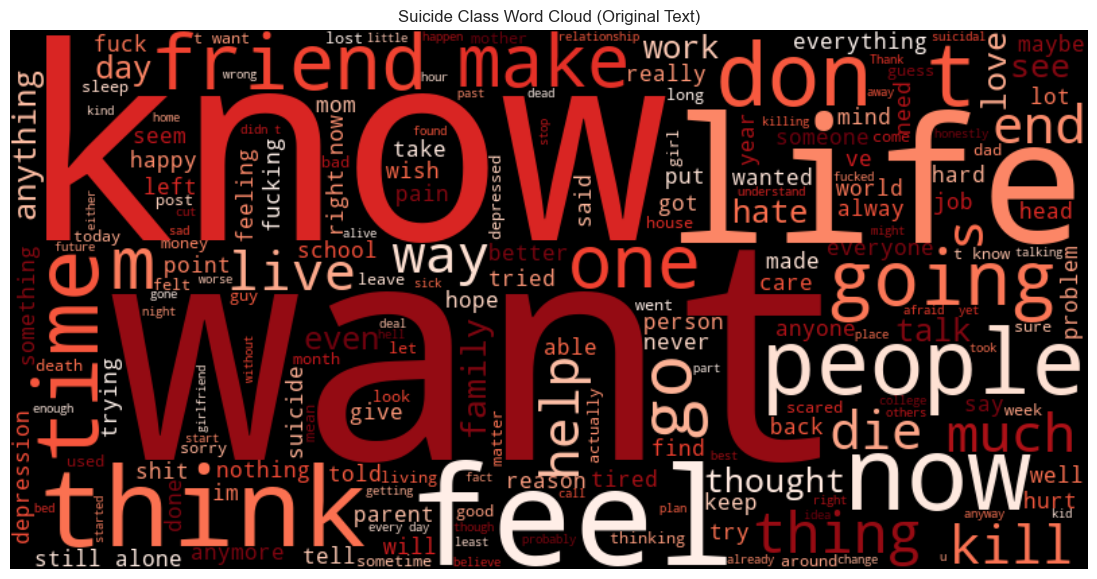

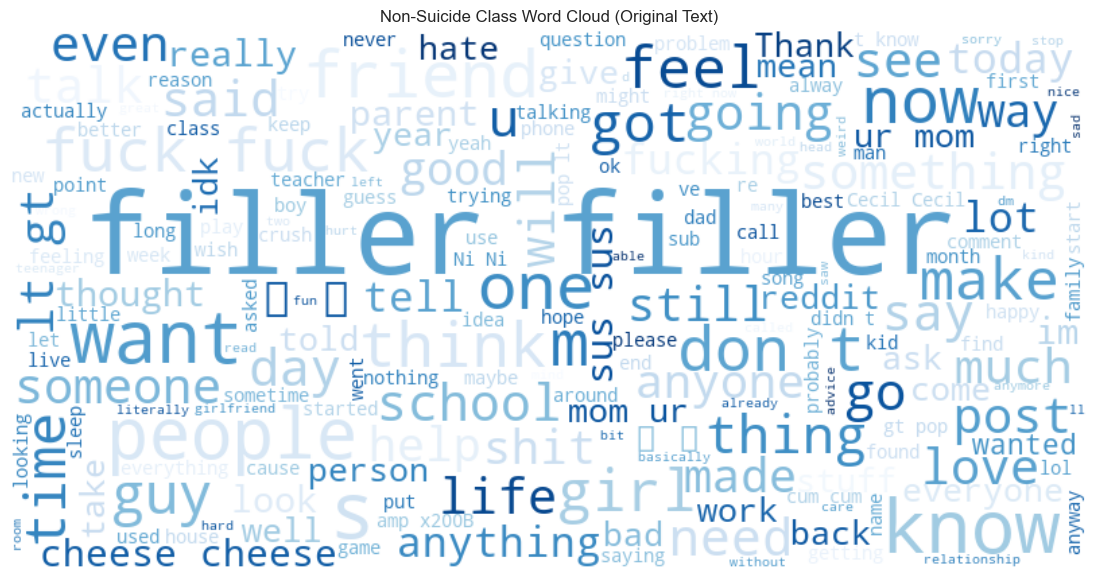

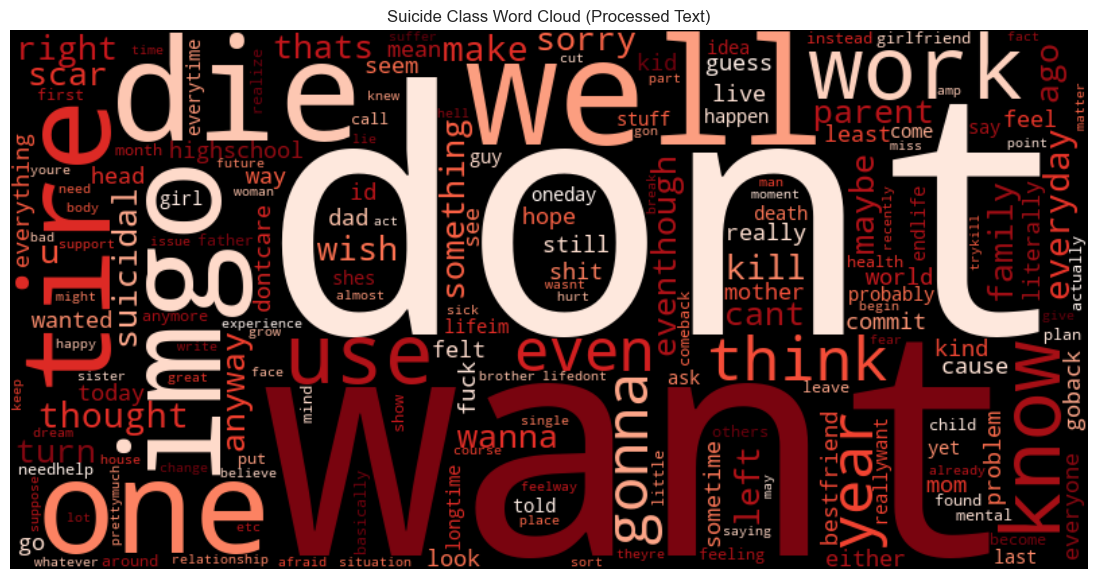

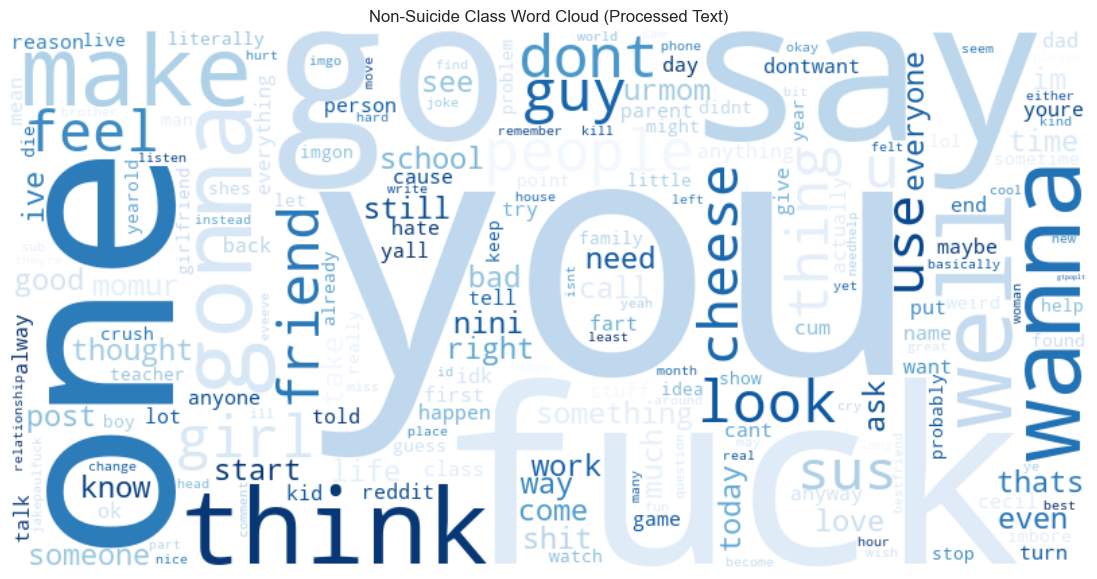

In [34]:
# Suicide Class Word Cloud (Original Text)
plt.figure(figsize=(14, 7))
plt.imshow(suicide_wordcloud_original, interpolation='bilinear')
plt.axis('off')
plt.title('Suicide Class Word Cloud (Original Text)')
plt.show()

# Non-Suicide Class Word Cloud (Original Text)
plt.figure(figsize=(14, 7))
plt.imshow(non_suicide_wordcloud_original, interpolation='bilinear')
plt.axis('off')
plt.title('Non-Suicide Class Word Cloud (Original Text)')
plt.show()

# Suicide Class Word Cloud (Processed Text)
plt.figure(figsize=(14, 7))
plt.imshow(suicide_wordcloud_processed, interpolation='bilinear')
plt.axis('off')
plt.title('Suicide Class Word Cloud (Processed Text)')
plt.show()

# Non-Suicide Class Word Cloud (Processed Text)
plt.figure(figsize=(14, 7))
plt.imshow(non_suicide_wordcloud_processed, interpolation='bilinear')
plt.axis('off')
plt.title('Non-Suicide Class Word Cloud (Processed Text)')
plt.show()